In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

sns.set()
sns.set_style("whitegrid", {'grid.linestyle': '--'})

In [3]:
data = pd.read_csv('../../dataset/train.csv')

In [4]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


## 各カラムのユニーク

- PassengerId 
    - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- HomePlanet: _categorical_
    - The planet the passenger departed from, typically their planet of permanent residence.
    - `['Europa' 'Earth' 'Mars']`
- CryoSleep: _boolean_
    - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins. 
- Cabin
    - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
    - CabinDeck: categorical
        - `['A'. 'B', 'C', 'D', 'E', 'F', 'G', 'T']`
    - CabinNum: int
    - CabinSide: categorical
        - `['P', 'S']`
- Destination: _categorical_
    - The planet the passenger will be debarking to.
    - `['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e']`
- Age: _int_
    - The age of the passenger.
- VIP: _boolean_
    - Whether the passenger has paid for special VIP service during the voyage.
- RoomService, FoodCourt, ShoppingMall, Spa, VRDeck: _int_
    - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- Name: 
    - The first and last names of the passenger.
- Transported: _boolean_
    - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.
    - label

In [5]:
for col in data.columns:
    print(col, data[col].unique(), len(data[col].unique()))

PassengerId ['0001_01' '0002_01' '0003_01' ... '9279_01' '9280_01' '9280_02'] 8693
HomePlanet ['Europa' 'Earth' 'Mars' nan] 4
CryoSleep [False True nan] 3
Cabin ['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S'] 6561
Destination ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan] 4
Age [39. 24. 58. 33. 16. 44. 26. 28. 35. 14. 34. 45. 32. 48. 31. 27.  0.  1.
 49. 29. 10.  7. 21. 62. 15. 43. 47.  2. 20. 23. 30. 17. 55.  4. 19. 56.
 nan 25. 38. 36. 22. 18. 42. 37. 13.  8. 40.  3. 54.  9.  6. 64. 67. 61.
 50. 41. 57. 11. 52. 51. 46. 60. 63. 59.  5. 79. 68. 74. 12. 53. 65. 71.
 75. 70. 76. 78. 73. 66. 69. 72. 77.] 81
VIP [False True nan] 3
RoomService [   0.  109.   43. ... 1569. 8586.  745.] 1274
FoodCourt [   0.    9. 3576. ... 3208. 6819. 4688.] 1508
ShoppingMall [   0.   25.  371. ... 1085.  510. 1872.] 1116
Spa [   0.  549. 6715. ... 2868. 1107. 1643.] 1328
VRDeck [   0.   44.   49. ... 1164.  971. 3235.] 1307
Name ['Maham Ofracculy' 'Juanna Vines' 'Altark Susent' ... 'Fayey C

### 要約統計量

In [6]:
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [7]:
data.describe(include='O')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


## 欠損率

In [8]:
for col in data.columns:
    print(col, data[col].isna().sum() / len(data))

PassengerId 0.0
HomePlanet 0.023122052225928908
CryoSleep 0.02496261359714713
Cabin 0.02289198205452663
Destination 0.02093638559760727
Age 0.020591280340503854
VIP 0.023352122397331185
RoomService 0.02082135051190613
FoodCourt 0.021051420683308408
ShoppingMall 0.02392729782583688
Spa 0.021051420683308408
VRDeck 0.021626596111814105
Name 0.023007017140227768
Transported 0.0


## labelの比率

<AxesSubplot:xlabel='Transported', ylabel='count'>

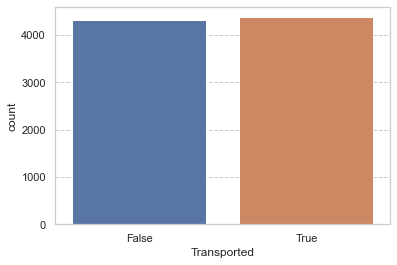

In [9]:
sns.countplot(x='Transported', data=data)

In [10]:
data['Transported'].sum() / len(data), (~data['Transported']).sum() / len(data)

(0.5036236051995858, 0.4963763948004141)

## 特徴量分布

### HomePlanet

<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

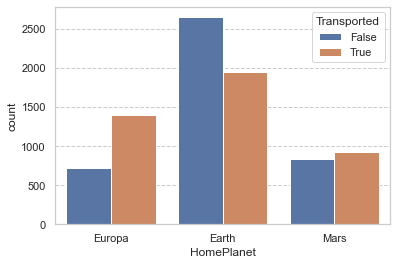

In [11]:
sns.countplot(x='HomePlanet', data=data, hue='Transported')

### CryoSleep

<AxesSubplot:xlabel='CryoSleep', ylabel='count'>

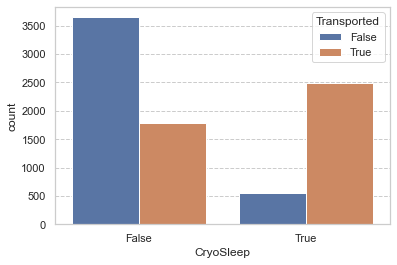

In [12]:
sns.countplot(x='CryoSleep', data=data, hue='Transported')

### Destination

<AxesSubplot:xlabel='Destination', ylabel='count'>

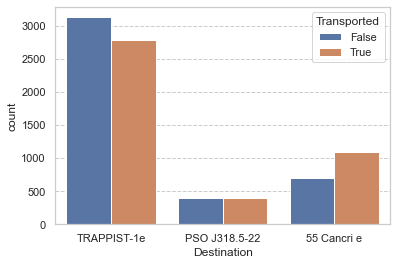

In [13]:
sns.countplot(x='Destination', data=data, hue='Transported')

### VIP

<AxesSubplot:xlabel='VIP', ylabel='count'>

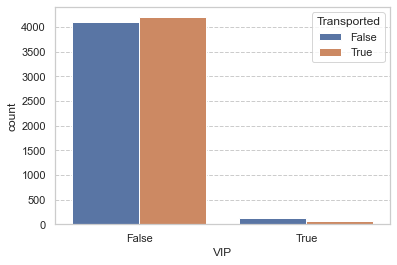

In [14]:
sns.countplot(x='VIP', data=data, hue='Transported')

### Age

In [15]:
# 最大、最小
data['Age'].max(), data['Age'].min()

(79.0, 0.0)

In [16]:
# 平均値、中央値、最頻値
data['Age'].mean(), data['Age'].median(), data['Age'].mode()[0]

(28.82793046746535, 27.0, 24.0)

<AxesSubplot:xlabel='Age', ylabel='Count'>

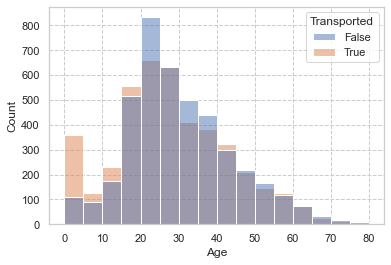

In [17]:
sns.histplot(x='Age', data=data, hue='Transported', binrange=(0, 80), bins=16)

### RoomService

In [15]:
# 最大、最小
data['RoomService'].max(), data['RoomService'].min()

(14327.0, 0.0)

In [16]:
# 平均値、中央値、最頻値
data['RoomService'].mean(), data['RoomService'].median(), data['RoomService'].mode()[0]

(224.687617481203, 0.0, 0.0)

<AxesSubplot:xlabel='Transported', ylabel='RoomService'>

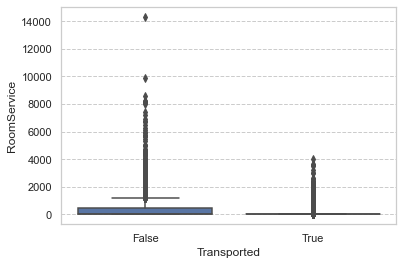

In [17]:
sns.boxplot(x='Transported', y='RoomService', data=data)

### FoodCourt

In [18]:
# 最大、最小
data['FoodCourt'].max(), data['FoodCourt'].min()

(29813.0, 0.0)

In [19]:
# 平均値、中央値、最頻値
data['FoodCourt'].mean(), data['FoodCourt'].median(), data['FoodCourt'].mode()[0]

(458.07720329024676, 0.0, 0.0)

<AxesSubplot:xlabel='Transported', ylabel='FoodCourt'>

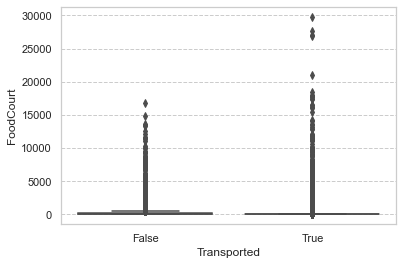

In [20]:
sns.boxplot(x='Transported', y='FoodCourt', data=data)

### ShoppingMall

In [21]:
# 最大、最小
data['ShoppingMall'].max(), data['ShoppingMall'].min()

(23492.0, 0.0)

In [22]:
# 平均値、中央値、最頻値
data['ShoppingMall'].mean(), data['ShoppingMall'].median(), data['ShoppingMall'].mode()[0]

(173.72916912197996, 0.0, 0.0)

<AxesSubplot:xlabel='Transported', ylabel='ShoppingMall'>

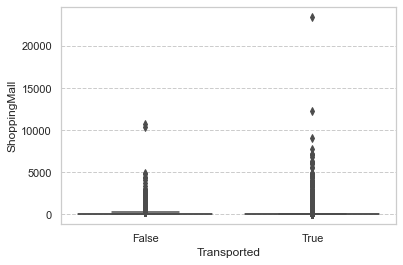

In [23]:
sns.boxplot(x='Transported', y='ShoppingMall', data=data)

### Spa

In [24]:
# 最大、最小
data['Spa'].max(), data['Spa'].min()

(22408.0, 0.0)

In [25]:
# 平均値、中央値、最頻値
data['Spa'].mean(), data['Spa'].median(), data['Spa'].mode()[0]

(311.1387779083431, 0.0, 0.0)

<AxesSubplot:xlabel='Transported', ylabel='Spa'>

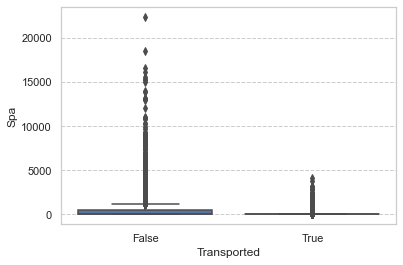

In [26]:
sns.boxplot(x='Transported', y='Spa', data=data)

### VRDeck

In [27]:
# 最大、最小
data['VRDeck'].max(), data['VRDeck'].min()

(24133.0, 0.0)

In [28]:
# 平均値、中央値、最頻値
data['VRDeck'].mean(), data['VRDeck'].median(), data['VRDeck'].mode()[0]

(304.8547912992357, 0.0, 0.0)

<AxesSubplot:xlabel='Transported', ylabel='VRDeck'>

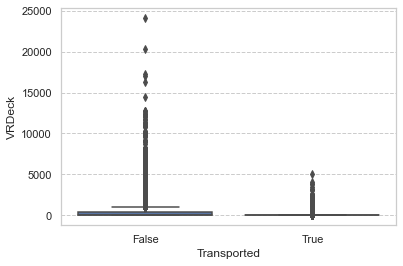

In [29]:
sns.boxplot(x='Transported', y='VRDeck', data=data)

### total bill of RoomService, FoodCourt, ShoppingMall, Spa, VRDeck

In [7]:
data['TotalBill'] = data[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)

In [31]:
# 最大、最小
data['TotalBill'].max(), data['TotalBill'].min()

(35987.0, 0.0)

In [32]:
# 平均値、中央値、最頻値
data['TotalBill'].mean(), data['TotalBill'].median(), data['TotalBill'].mode()[0]

(1440.8663292304152, 716.0, 0.0)

<AxesSubplot:xlabel='Transported', ylabel='TotalBill'>

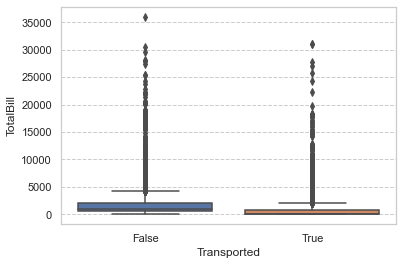

In [33]:
sns.boxplot(x='Transported', y='TotalBill', data=data)

### Cabin


In [8]:
# split on `/` to cols (deck/num/side)
cabin = data['Cabin'].str.split('/', expand=True).rename(columns={0: 'CabinDeck', 1: 'CabinNum', 2: 'CabinSide'})
cabin['CabinNum'] = cabin['CabinNum'].astype(float)

data = pd.concat([data, cabin], axis=1)

In [35]:
data.CabinDeck.unique()

array(['B', 'F', 'A', 'G', nan, 'E', 'D', 'C', 'T'], dtype=object)

In [36]:
data.CabinNum.unique()

array([0.000e+00, 1.000e+00, 2.000e+00, ..., 1.892e+03, 1.893e+03,
       1.894e+03])

In [37]:
data.CabinSide.unique()

array(['P', 'S', nan], dtype=object)

In [38]:
# deckでNaNは他のカラムでもNaN
(~cabin[cabin['CabinDeck'].isna()].isna()).sum(axis=0)

CabinDeck    0
CabinNum     0
CabinSide    0
dtype: int64

#### CabinDeck

<AxesSubplot:xlabel='CabinDeck', ylabel='count'>

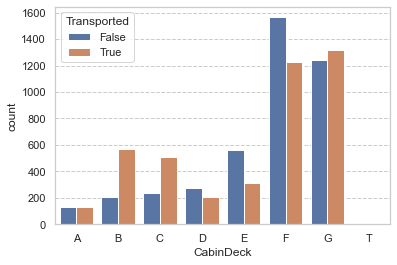

In [44]:
sns.countplot(x='CabinDeck', data=data, hue='Transported', order=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'])

#### CabinSide

<AxesSubplot:xlabel='CabinSide', ylabel='count'>

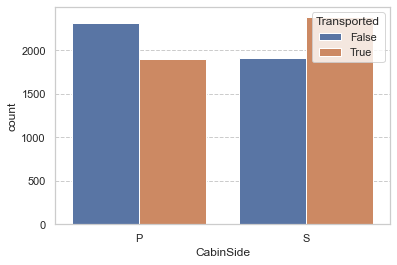

In [40]:
sns.countplot(x='CabinSide', data=data, hue='Transported')

#### CabinNum

In [41]:
# 最大、最小、最頻値
data['CabinNum'].max(), data['CabinNum'].min(), data['CabinNum'].mode()[0]

(1894.0, 0.0, 82.0)

<AxesSubplot:xlabel='CabinNum', ylabel='Count'>

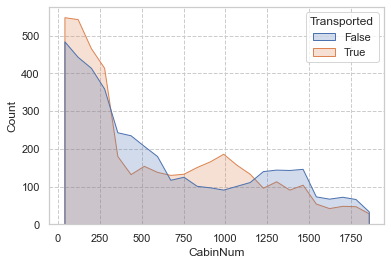

In [42]:
sns.histplot(x='CabinNum', data=data, hue='Transported', element='poly')

### 相関係数

In [13]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalBill,CabinDeck,CabinNum,CabinSide
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,B,0.0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0,F,0.0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0,A,0.0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0,A,0.0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0,F,1.0,S


In [19]:
df = data[['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'TotalBill', 'CabinDeck', 'CabinNum', 'CabinSide', 'Transported']]
df['CryoSleep'] = df['CryoSleep'].astype(float)
df['VIP'] = df['VIP'].astype(float)
df['Transported'] = df['Transported'].astype(float)

df.replace({
    'HomePlanet': {'Europa': 0, 'Earth': 1, 'Mars': 2},
    'Destination': {'TRAPPIST-1e': 0, 'PSO J318.5-22': 1, '55 Cancri e': 2},
    'CabinDeck': {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 4 , 'G': 5 , 'T': 6},
    'CabinSide': {'P': 0, 'S': 1},
}, inplace=True)

/var/folders/zp/6qwnpvfn0cs2whczwk_5pvqh0000gs/T/ipykernel_74940/4218166959.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CryoSleep'] = df['CryoSleep'].astype(float)
/var/folders/zp/6qwnpvfn0cs2whczwk_5pvqh0000gs/T/ipykernel_74940/4218166959.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['VIP'] = df['VIP'].astype(float)
/var/folders/zp/6qwnpvfn0cs2whczwk_5pvqh0000gs/T/ipykernel_74940/4218166959.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [21]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,TotalBill,CabinDeck,CabinNum,CabinSide,Transported
0,0001_01,0.0,0.0,0.0,39.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0002_01,1.0,0.0,0.0,24.0,0.0,736.0,4.0,0.0,1.0,1.0
2,0003_01,0.0,0.0,0.0,58.0,1.0,10383.0,0.0,0.0,1.0,0.0
3,0003_02,0.0,0.0,0.0,33.0,0.0,5176.0,0.0,0.0,1.0,0.0
4,0004_01,1.0,0.0,0.0,16.0,0.0,1091.0,4.0,1.0,1.0,1.0


<AxesSubplot:>

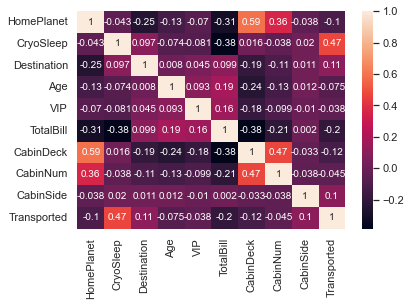

In [20]:
sns.heatmap(df.corr(), annot=True)

採用する特徴量
- HomePlanet→最頻値
- CryoSleep→最頻値
- Destination→最頻値
- Age→中央値で埋める
- VIP→VIPなしで埋める
- CabinNum→最頻値で埋める
- CabinSide→CabinNum==82となっているCabinSideの最頻値で埋める？→Pで埋める

In [31]:
# CabinNum==82となっているCabinSideの最頻値
data.loc[data.CabinNum == 82, 'CabinSide'].value_counts()

P    17
S    11
Name: CabinSide, dtype: int64